In [1]:

# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline
# Load .env enviroment variables
load_dotenv()

True

In [2]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth= 5.3

In [3]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [4]:
#Fetch current BTC price 
btc_price = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD")

#Fetch current ETH price 
eth_price = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD")


In [5]:
#Extract response / Retrieve output for BTC & ETH in order to get names of rows
btc_response = btc_price.content
eth_response = eth_price.content

#Convert output to JSON 
btc_data = btc_price.json()
eth_data = eth_price.json()

In [6]:
#Fetch prices of both BTC and ETH in order to compute total value of crypto portfolio
btc_price = btc_data['data']['1']['quotes']['USD']['price'] 
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

#Compute current value of my crypto
total_btc_value = my_btc * btc_price 
total_eth_value = my_eth * eth_price

#Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${total_btc_value:0.2f}.")
print(f"the current value of your {my_eth} ETH is ${total_eth_value:0.2f}.")

The current value of your 1.2 BTC is $67230.00.
the current value of your 5.3 ETH is $11580.98.


In [7]:
# Current amount of shares
SPY = 50 
AGG = 200

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = "PK788875ZTDSSM3X3NQU"
alpaca_secret_key = "1HhXFNCTleenc6OvIDD7ehf6DcOTyj4rykC4dsge"

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2021-4-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_barset(

    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-04-13 00:00:00-04:00  114.12  114.46  114.11  114.46  3882646  411.53   

                                                              
                              high     low   close    volume  
time                                                          
2021-04-13 00:00:00-04:00  413.529  411.12  412.82  50616046

In [10]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.46
Current SPY closing price: $412.82


In [11]:
# Compute the current value of shares
my_spy = 50
my_agg = 200
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20641.00
The current value of your 200 AGG shares is $22892.00


In [12]:
# Set monthly household income
monthly_household_income = 12000

# Create savings DataFrame
crypto ={
    "SPY": [my_spy_value],
    "AGG": [my_agg_value]
}

df_savings = pd.DataFrame(crypto)


# Display savings DataFrame
display(df_savings)

,SPY,AGG
0,20641.0,22892.0


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='0'>

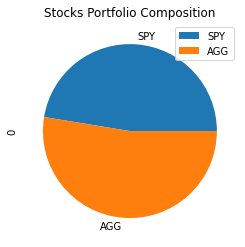

In [13]:
# Plot savings pie chart
df_savings.T.plot.pie(y=0, title="Stocks Portfolio Composition")


In [14]:
# Set ideal emergency fund
monthly_income = 12000
emergency_fund = monthly_income * 3


# Calculate total amount of savings
total_savings = my_spy_value + my_agg_value
total_savings

# Validate saving health
if total_savings > emergency_fund:
    print(" your savings is 3x greater than your emergency fund.")
elif total_savings == emergency_fund:
    print("you have reached your goal of 3x your monthly income in your emergency fund.")

else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

 your savings is 3x greater than your emergency fund.


In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  298252778  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.16  261233795  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  302880969  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  280560712  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  211595249

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,9.681182e-01,9.781779e-01,1.002395e+00,9.993000e-01,9.835045e-01,9.971264e-01,9.953648e-01,1.002914e+00,1.010339e+00,1.011824e+00,...,1.001595e+00,1.010119e+00,1.003379e+00,1.001766e+00,1.005060e+00,9.949367e-01,1.020298e+00,9.956180e-01,9.985166e-01,1.000050e+00
2,9.566871e-01,9.665122e-01,1.017930e+00,9.850435e-01,9.986619e-01,1.010058e+00,1.024969e+00,1.012741e+00,1.009307e+00,1.003041e+00,...,9.936385e-01,1.015369e+00,9.906006e-01,1.019167e+00,9.933793e-01,9.957504e-01,1.015596e+00,1.013770e+00,1.020298e+00,1.006252e+00
3,9.614661e-01,9.736813e-01,1.015464e+00,9.853867e-01,9.981186e-01,1.019697e+00,1.019865e+00,9.866805e-01,1.025486e+00,1.019122e+00,...,1.005721e+00,1.022703e+00,1.006887e+00,1.024018e+00,9.799851e-01,9.908036e-01,1.017076e+00,1.004970e+00,1.007638e+00,9.935006e-01
4,9.563673e-01,9.558846e-01,1.022598e+00,9.597997e-01,1.018320e+00,1.029739e+00,1.044992e+00,9.825850e-01,1.032064e+00,1.002875e+00,...,1.001406e+00,1.019829e+00,1.010872e+00,1.039009e+00,9.663759e-01,9.587578e-01,1.014234e+00,1.010302e+00,1.015429e+00,1.005796e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.972302e+08,1.447054e+08,3.921707e+08,1.874025e+08,3.817078e+08,1.056581e+08,3.840500e+08,2.914250e+08,6.797130e+08,5.374254e+06,...,8.056896e+07,7.336655e+08,3.586499e+07,6.238285e+08,3.243969e+08,6.826645e+07,1.571197e+08,1.995406e+08,3.965007e+07,1.528796e+08
7557,2.989548e+08,1.453887e+08,3.931433e+08,1.867797e+08,3.839567e+08,1.070452e+08,3.779701e+08,2.927236e+08,6.760985e+08,5.531222e+06,...,8.119502e+07,7.284319e+08,3.525729e+07,6.172312e+08,3.248619e+08,6.805909e+07,1.609420e+08,1.986619e+08,3.948758e+07,1.536172e+08
7558,3.017146e+08,1.455502e+08,3.950471e+08,1.873970e+08,3.876080e+08,1.078714e+08,3.726383e+08,2.915157e+08,6.744597e+08,5.571526e+06,...,7.947633e+07,7.360338e+08,3.433461e+07,6.254571e+08,3.225896e+08,6.908646e+07,1.599200e+08,2.022638e+08,4.046020e+07,1.562023e+08
7559,3.050269e+08,1.465403e+08,3.967177e+08,1.886993e+08,3.876079e+08,1.087593e+08,3.682036e+08,2.883746e+08,6.756942e+08,5.599093e+06,...,7.953966e+07,7.449620e+08,3.430556e+07,6.325957e+08,3.265541e+08,6.943941e+07,1.614999e+08,2.029082e+08,4.127295e+07,1.583292e+08


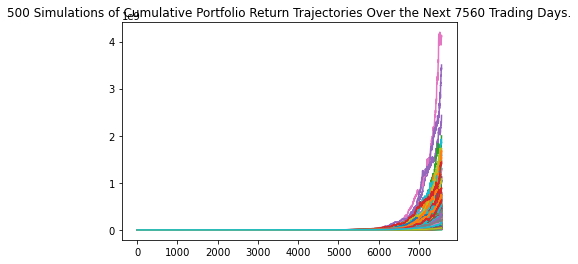

In [20]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

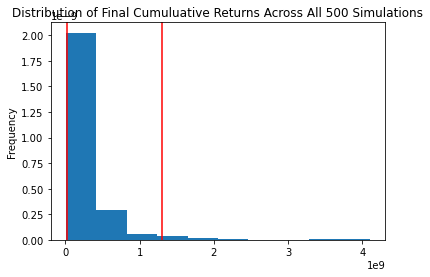

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           5.000000e+02
mean            2.740693e+08
std             3.821803e+08
min             5.558420e+06
25%             7.790952e+07
50%             1.522597e+08
75%             3.333017e+08
max             4.103190e+09
95% CI Lower    1.994247e+07
95% CI Upper    1.298878e+09
Name: 7560, dtype: float64


In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $398849361362.69 and $25977556997350.82


In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $598274042044.04 and $38966335496026.22


In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993619,0.989619,0.985793,0.990827,0.999219,0.992987,1.021622,1.007753,1.019655,1.034159,...,1.001527,1.008243,1.004319,0.987058,1.045552,1.007121,1.000623,1.010118,1.017765,1.034077
2,1.011499,0.984378,0.980760,0.996068,0.998420,1.019561,1.000366,1.007029,1.023147,1.041317,...,1.015159,1.008862,1.007480,0.975173,1.034638,1.001934,1.019556,1.021620,1.011599,1.040674
3,1.021590,0.968713,0.968293,0.991318,0.996836,1.022441,1.005106,1.028625,1.028884,1.029704,...,1.022172,1.006130,1.014393,0.978248,1.035163,1.007690,1.026364,1.031153,1.009934,1.025067
4,1.019708,0.984792,0.970259,0.998693,1.006657,1.009951,0.995972,1.016672,1.017912,1.008358,...,1.017859,1.018738,1.011382,0.972365,1.042593,1.007179,1.026294,1.037883,1.039957,1.023729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,30.991390,11.589023,21.573863,29.402590,19.087352,79.995934,20.262446,20.035217,31.637251,84.990001,...,25.610514,66.108561,14.011662,36.607912,26.009067,16.769658,12.983147,18.994733,46.219535,11.143345
1257,30.725057,11.780791,21.613710,29.619359,19.660192,80.658836,20.636302,19.725740,31.405544,85.339805,...,25.508989,66.568798,14.192240,37.171336,26.343193,16.915069,13.131487,19.191379,45.814798,11.251592
1258,31.192307,11.744406,21.804240,29.069930,19.700455,79.941025,20.604557,19.573769,31.365287,84.726113,...,25.352667,66.120623,14.063794,36.608975,26.511633,17.075877,13.151042,19.604825,45.520490,11.266649
1259,31.919255,12.037308,22.206712,28.927083,19.464888,80.296164,20.515468,19.873193,31.002227,84.483301,...,25.248225,67.584077,14.151060,36.705437,27.036328,17.263384,13.421334,19.644377,45.141812,11.232874


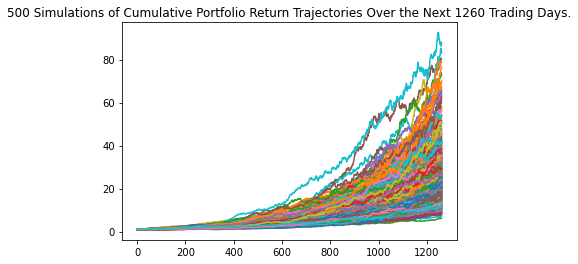

In [27]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

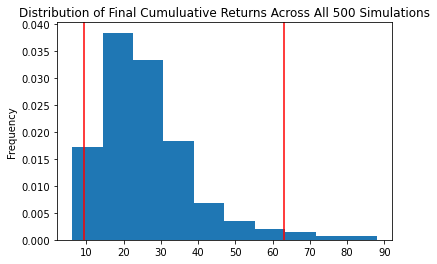

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl5 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl5)

count           500.000000
mean             26.308728
std              13.020191
min               6.171610
25%              17.368766
50%              24.131178
75%              31.896810
max              87.895585
95% CI Lower      9.292666
95% CI Upper     62.952487
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $1196548084088.07 and $77932670992052.45


In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996929,0.998467,1.018289,0.999440,0.991978,1.007778,1.012158,0.994714,1.003975,0.999306,...,0.999528,1.012160,0.985960,1.015285,1.008270,1.000941,0.978797,1.015949,1.002140,0.987294
2,1.000689,1.020603,1.033505,0.985907,1.007159,1.003875,1.016691,0.981005,1.007341,0.988618,...,1.006997,1.016210,0.992269,1.007938,1.024059,1.013272,0.962560,1.014071,0.990241,0.991303
3,1.006499,1.022414,1.017533,0.965055,1.005304,1.005326,1.025006,0.983034,1.008383,0.981353,...,1.002649,1.021179,0.995348,0.987483,1.018514,0.993402,0.961087,1.022619,0.971880,0.984116
4,1.021821,1.001782,1.024846,0.974217,0.992418,1.024613,1.030437,0.971700,1.014694,0.970378,...,1.030326,1.014873,1.014355,0.984118,1.026482,1.002660,0.950320,1.042694,0.974990,1.006141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,541.192927,279.082440,1281.705627,988.646855,399.849044,916.005821,497.464459,705.507193,348.840552,923.817136,...,606.157921,1817.740840,397.462378,916.892600,517.986894,818.543734,468.528771,1423.224467,1159.467127,741.762764
2517,549.556226,275.951032,1284.260703,1006.163493,403.742255,925.337867,497.657981,712.706202,350.441297,925.417807,...,613.143468,1786.981095,393.691485,915.610756,529.010453,823.292368,462.362495,1429.188845,1167.462435,761.670860
2518,555.951555,279.495083,1290.450009,1020.131886,403.611942,923.049191,503.115368,731.804655,341.699517,953.211312,...,620.414370,1803.897886,398.791006,923.620214,524.647055,826.091327,467.125953,1434.701962,1158.567379,754.553962
2519,545.451193,278.960196,1293.232451,1011.435838,402.823696,932.777493,502.854702,747.017543,343.753099,972.082388,...,630.895532,1842.514065,398.688792,919.576425,543.126947,836.273516,459.584099,1466.890271,1138.841803,763.784702


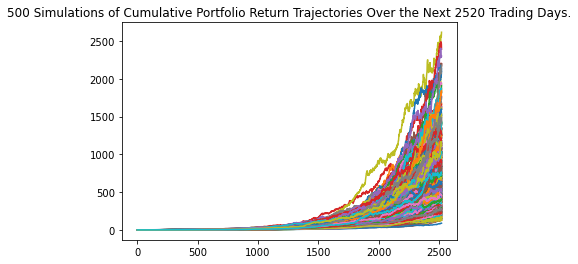

In [34]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

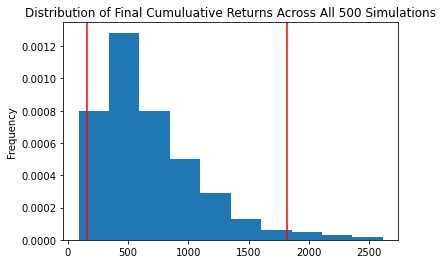

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl10 = MC_ten_year.summarize_cumulative_return()


# Print summary statistics
print(tbl10)

count            500.000000
mean             686.669448
std              424.273213
min               89.547295
25%              393.895667
50%              581.161546
75%              887.864235
max             2614.648807
95% CI Lower     159.233149
95% CI Upper    1817.350181
Name: 2520, dtype: float64
